C:\Users\elsab\AppData\Local\Temp\ipykernel_22316\658338285.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data[col].fillna(self.data[col].median(), inplace=True)
C:\Users\elsab\AppData\Local\Temp\ipykernel_22316\658338285.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

                  bedrooms  livingarea  surfaceoftheplot  price_per_m2  \
bedrooms          1.000000    0.566866          0.189393     -0.284353   
livingarea        0.566866    1.000000          0.260581     -0.329753   
surfaceoftheplot  0.189393    0.260581          1.000000     -0.088606   
price_per_m2     -0.284353   -0.329753         -0.088606      1.000000   
gardensurface     0.096995    0.111693          0.551626     -0.038321   
facades           0.267318    0.280500          0.246158     -0.214015   
pool              0.127069    0.185103          0.136702     -0.041649   
price_per_m2     -0.284353   -0.329753         -0.088606      1.000000   

                  gardensurface   facades      pool  price_per_m2  
bedrooms               0.096995  0.267318  0.127069     -0.284353  
livingarea             0.111693  0.280500  0.185103     -0.329753  
surfaceoftheplot       0.551626  0.246158  0.136702     -0.088606  
price_per_m2          -0.038321 -0.214015 -0.041649      1.00

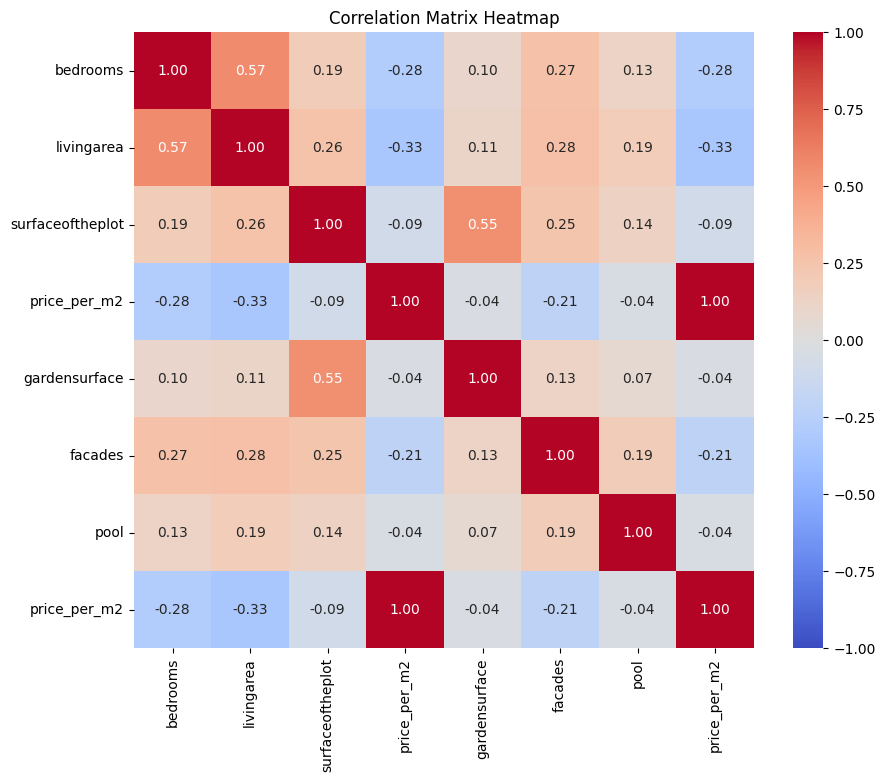


Training Metrics:
MAE: 106220.5044
RMSE: 172183.7651
R²: 0.6540
MAPE: 21.4296
sMAPE: 19.2183

Test Metrics:
MAE: 105616.4459
RMSE: 165119.3849
R²: 0.6749
MAPE: 21.4036
sMAPE: 19.2817


c:\Users\elsab\.anaconda\.android\envs\myenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\elsab\.anaconda\.android\envs\myenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


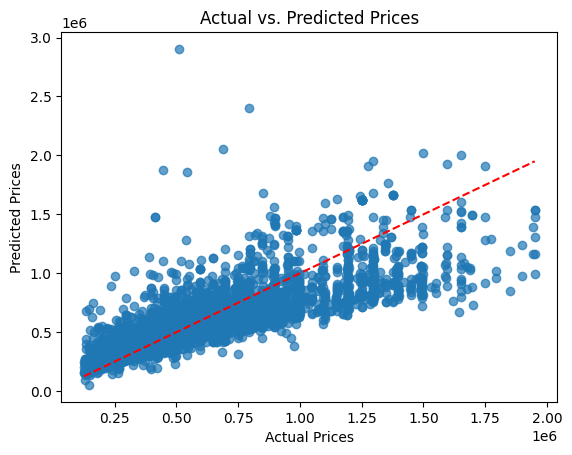

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

class LinearRegressionModel:
    def __init__(self, data: pd.DataFrame):
        """
        Initializes the LinearRegressionModel class with a dataset.
        Cleans the data and performs feature engineering upon initialization.
        """
        self.data = data
        self.model = LinearRegression()
        self.cleaner()
        self.feature_engineering()
      

    def cleaner(self):
        """Cleans the dataset by handling missing values and removing outliers."""
        for col in self.data.select_dtypes(include=["float64", "int64"]).columns:
            self.data[col].fillna(self.data[col].median(), inplace=True)

        for col in self.data.select_dtypes(include=["object"]).columns:
            self.data[col].fillna(self.data[col].mode()[0], inplace=True)
        data.dropna(axis=1)

        columns_to_drop = ["Unnamed: 0", "municipality_code", "locality", "postal_code"]
        self.data.drop(columns=columns_to_drop, errors="ignore", inplace=True)

        self.data = self.data[
            (self.data["price"] > self.data["price"].quantile(0.01))
            & (self.data["price"] < self.data["price"].quantile(0.99))
        ]

    
    def feature_engineering(self):
        """Transforms the data and creates new features for modeling."""
        # Calculate price per square meter as a new feature (The +1 is used in the calculation of price_per_m2 as a safeguard against division by zero.)
        self.data["price_per_m2"] = self.data["price"] / (self.data["livingarea"] + 1)

        # """Transforms the data and creates new features for modeling."""
        # if "type" in self.data.columns:
        #     # Encode categorical variables into numerical format
        #     self.data["is_apartment"] = (self.data["type"] == "apartment").astype(int)
        #     self.data["is_house"] = (self.data["type"] == "house").astype(int)
        # else:
        #     # If 'type' is missing, set default values
        #     self.data["is_apartment"] = 0
        #     self.data["is_house"] = 0

        def create_pipeline(self):
            """Creates the pipeline for preprocessing and modeling."""
            # Identify categorical and numerical features
            numeric_features = [
                "bedrooms",
                "livingarea",
                "surfaceoftheplot",
                "price_per_m2",
                "gardensurface",
                "facades",
                "pool"
            ]
        
             # Preprocessing steps for numeric features
            numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
                ('scaler', StandardScaler())  # Standardize numerical features
            ])

            # Preprocessing steps for categorical features (if any)
            categorical_features = self.data.select_dtypes(include=['object']).columns.tolist()
            categorical_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent'))  # Handle missing values
            ])

            # Create a column transformer to apply preprocessing to each column
            self.preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ])

            # Create the full pipeline: preprocessing + model
            self.pipeline = Pipeline(steps=[
                ('preprocessor', self.preprocessor),
                ('model', self.model)
            ])

    def split_data(self):
        """Splits the data into training and test sets."""
        numeric_features = [
            "bedrooms",
            "livingarea",
            "surfaceoftheplot",
            "price_per_m2",
            "gardensurface",
            "facades",
            "pool",
        ]
        X = self.data[numeric_features]
        y = self.data["price"]
      # Check correlation matrix to detect multicollinearity
        corr_matrix = self.data[numeric_features + ["price_per_m2"]].corr()
        print(corr_matrix)

        #Plot the heatmap
        plt.figure(figsize=(10, 8))  # Set the figure size
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, vmin=-1, vmax=1)

        # Add labels and title
        plt.title("Correlation Matrix Heatmap")
        plt.show()
        return train_test_split(X, y, test_size=0.3, random_state=41)

    def train_model(self, X_train, y_train):
        """Trains the Linear Regression model."""
        self.model.fit(X_train, y_train)

    def evaluate_metrics(self, y_true, y_pred):
        """Calculates evaluation metrics."""
        mae = mean_absolute_error(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        r2 = r2_score(y_true, y_pred)
        mape = 100 * (abs((y_true - y_pred) / y_true)).mean()
        smape = (
            100
            * (
                abs(y_true - y_pred)
                / ((abs(y_true) + abs(y_pred)) / 2)
            ).mean()
        )
        return {"MAE": mae, "RMSE": rmse, "R²": r2, "MAPE": mape, "sMAPE": smape}
    

    def evaluate_model(self, X_train, y_train, X_test, y_test):
        """Evaluates the model on training and test data."""
        y_train_pred = self.model.predict(X_train)
        y_test_pred = self.model.predict(X_test)

        train_metrics = self.evaluate_metrics(y_train, y_train_pred)
        test_metrics = self.evaluate_metrics(y_test, y_test_pred)

        print("\nTraining Metrics:")
        for metric, value in train_metrics.items():
            print(f"{metric}: {value:.4f}")

        print("\nTest Metrics:")
        for metric, value in test_metrics.items():
            print(f"{metric}: {value:.4f}")

        return y_test, y_test_pred

    def visualize_results(self, y_test, y_pred):
        """Visualizes actual vs. predicted prices."""
        plt.scatter(y_test, y_pred, alpha=0.7)
        plt.plot(
            [min(y_test), max(y_test)],
            [min(y_test), max(y_test)],
            color="red",
            linestyle="--",
        )
        plt.xlabel("Actual Prices")
        plt.ylabel("Predicted Prices")
        plt.title("Actual vs. Predicted Prices")
        plt.show()

# Load the dataset
data = pd.read_csv("all_province_municipality.csv", low_memory=False)

# Initialize the model
model = LinearRegressionModel(data)

# Split the data
X_train, X_test, y_train, y_test = model.split_data()

# Train the model
model.train_model(X_train, y_train)

# Evaluate the model
y_test_actual, y_pred_actual = model.evaluate_model(X_train, y_train, X_test, y_test)

# Visualize the results
model.visualize_results(y_test_actual, y_pred_actual)


#### How could you improve this result?

-Removing Multicollinearity

-Check the correlation matrix and remove or combine features that are highly correlated (above a certain threshold, like 0.8).

-outliers handling

dropped redondant or useless columns


-Feature Engineering


#### Which part of the process has the most impact on the results?

-Data Cleaning

-Feature Selection/Engineering

-Multicollinearity

#### How should you divide your time working on this kind of project?

Data Cleaning (30-40%): This step includes handling missing values, removing or adjusting outliers, and ensuring data consistency.

Feature Engineering (30-40%): analyze the features, creating new features, and ensuring that the data captures relevant patterns,Transforms the data and creates new features for modeling.


Training (10-20%): Once the data is clean and the features are ready,  training the model.testing different algorithms, and choosing the best one based on performance.

Trains the Linear Regression model
Model Evaluation (10-20%):Evaluates the model on test data. 

Visualizing actual vs. predicted prices and residuals helps in interpreting the model.